In [1]:
# Note: I have written this code so that it can be easily understood and divided the code into different modules for ease
# Feel free verify the final parameter values by using the Normal Equation
import numpy as np
from numpy.linalg import inv # For the normal eqn which I have not implemented here
import matplotlib.pyplot as plt

In [13]:
# Note as I am not using pandas, I have manually removed the outlier value and the column headings, you can use dropna to do the same.

def load_dataset(train_dataset_filename, test_dataset_filename):
    
    #complete_train_dataset = np.genfromtxt(train_dataset_filename, dtype = None, delimiter=",")
    complete_train_dataset = np.loadtxt(train_dataset_filename,delimiter=",")
    print(complete_train_dataset.shape)

    complete_test_dataset = np.loadtxt(test_dataset_filename,delimiter=",")
    print(complete_test_dataset.shape)
    
    train_dataset_input_without_bias, train_dataset_output = get_intermediate_input_and_output(complete_train_dataset)
    normalized_train_dataset_input_without_bias, mean, sigma = normalize(train_dataset_input_without_bias)
    train_dataset_input = add_bias_column(normalized_train_dataset_input_without_bias)
    
    test_dataset_input_without_bias, test_dataset_output = get_intermediate_input_and_output(complete_test_dataset)
    normalized_test_dataset_input_without_bias = (test_dataset_input_without_bias - mean) / sigma
    test_dataset_input = add_bias_column(normalized_test_dataset_input_without_bias)
    
    return train_dataset_input, train_dataset_output, test_dataset_input, test_dataset_output



In [3]:
# It is always best to normalize your dataset for faster convergence

def normalize(matrix):
    mean = np.mean(matrix, axis=0)
    sigma = np.std(matrix, axis=0)
    norm_matrix = (matrix - mean) / sigma
    
    return norm_matrix, mean, sigma

In [4]:
def get_intermediate_input_and_output(dataset):
    input = dataset[:,:-1]
    output = dataset[:,-1]
    
    return input, np.reshape(output, (output.shape[0],1))

In [5]:
def add_bias_column(input):
    m = input.shape[0]
    bias = np.ones((m,1))
    final_input = np.concatenate((bias,input), axis=1)
    
    return final_input

In [6]:
# Cost with regularization

def calculate_cost(input_mat, output_mat, parameters, lam):
    hypothesis = np.dot(input_mat, parameters)
    cost = ((1/(2 * m)) * (np.dot((hypothesis - output_mat).T, (hypothesis - output_mat)))) + (lam * np.sum(parameters))
    
    return cost

In [7]:
# Gradient update with regularization
# I use gradient descent as it is a process which allows the viewers to understand best how lines are fit on a dataset by constant updates on parameters in the direction of steepest slope

def gradient_descent(input_mat, output_mat, parameters, alpha, iterations, m, lam):
    print("Initial Cost = " + str(calculate_cost(input_mat, output_mat, parameters, lam)))
    for i in range(iterations):
        #hypothesis = np.dot(input_mat, parameters)
        parameters = parameters - ((alpha/m) * (np.dot((input_mat.T), (np.dot(input_mat,parameters) - output_mat))))
        parameters[1] = parameters[1] - ((alpha * lam/m) * parameters[1])
        
        if (i % 1000) == 0:
            print("Iteration:" + str(i) + " Cost=" + str(calculate_cost(input_mat, output_mat, parameters, lam)))
           
            
    print("Iteration:" + str(iterations) + " Cost=" + str(calculate_cost(input_mat, output_mat, parameters, lam)))
    print(parameters)
    
    return parameters

In [40]:
# Feel free to tweak the values of the hyperparamters
alpha = 0.001
iterations = 15000
lam = 0

train_dataset_filename = "/Users/Madhav/Downloads/random-linear-regression/train.csv"
test_dataset_filename = "/Users/Madhav/Downloads/random-linear-regression/test.csv"

training_input, training_output, test_input, test_output = load_dataset(train_dataset_filename, test_dataset_filename)
m = training_input.shape[0]

# initialize parameters
parameters = np.array([[0], [0]])

final_parameters = gradient_descent(training_input, training_output, parameters, alpha, iterations, m, lam)


(699, 2)
(300, 2)
Initial Cost = [[ 1670.06241309]]
Iteration:0 Cost=[[ 1666.73182214]]
Iteration:1000 Cost=[[ 228.74403459]]
Iteration:2000 Cost=[[ 34.32819299]]
Iteration:3000 Cost=[[ 8.04318571]]
Iteration:4000 Cost=[[ 4.48945468]]
Iteration:5000 Cost=[[ 4.00899051]]
Iteration:6000 Cost=[[ 3.94403179]]
Iteration:7000 Cost=[[ 3.93524938]]
Iteration:8000 Cost=[[ 3.934062]]
Iteration:9000 Cost=[[ 3.93390146]]
Iteration:10000 Cost=[[ 3.93387976]]
Iteration:11000 Cost=[[ 3.93387683]]
Iteration:12000 Cost=[[ 3.93387643]]
Iteration:13000 Cost=[[ 3.93387638]]
Iteration:14000 Cost=[[ 3.93387637]]
Iteration:15000 Cost=[[ 3.93387637]]
[[ 49.93985401]
 [ 28.95282424]]


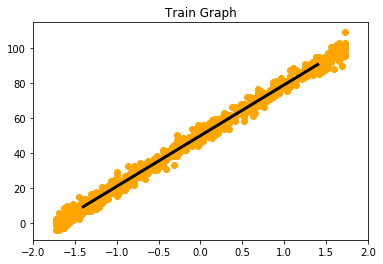

In [41]:
plt.title("Train Graph")
plt.scatter(training_input[:,1],training_output,color='orange')
plt.xlim([-2,2])
x = np.array([-1.4, -1.2, -1, -0.8, -0.6 ,-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4])
y = float(final_parameters[0]) + (float(final_parameters[1]) * x)
#y = float(final_parameters[0]) + (float(130) * x)
plt.plot(x,y,'black',linewidth=3)
plt.show()

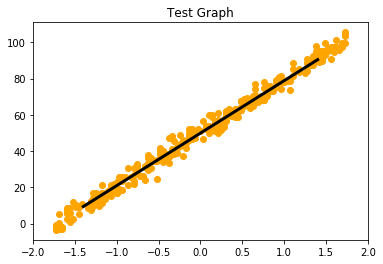

In [42]:
plt.title("Test Graph")
plt.scatter(test_input[:,1],test_output,color='orange')
plt.xlim([-2,2])
x = np.array([-1.4, -1.2, -1, -0.8, -0.6 ,-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4])
y = float(final_parameters[0]) + (float(final_parameters[1]) * x)
#y = float(final_parameters[0]) + (float(130) * x)
plt.plot(x,y,'black',linewidth=3)
plt.show()

In [44]:
# To get a good evaluation metric for regression R^2 can be used, but note that it is not a good way to estimate test set predictions.
# Thus in this case I have used the cost function defined above
# The correctnes of the regression can be verified by looking at the graph plots above for both test and train

train_hypothesis = np.dot(training_input, final_parameters)
train_final_cost = calculate_cost(training_input, training_output, final_parameters, 0)
print(train_final_cost)

[[ 3.93387637]]


In [45]:
test_hypothesis = np.dot(test_input, final_parameters)
test_predicted_cost = calculate_cost(test_input, test_output, final_parameters,0)
print(test_predicted_cost)

# Note that the final parameters do not overfit the training dataset as they give a lower cost for the test dataset

[[ 2.02423594]]
